In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

In [111]:
dfHeart = pd.read_csv('heart_disease.csv')

In [ ]:
dfHeart.head(4)

In [103]:
dfHeart['HadDiabetes'].unique()

array([1, 0, 'No, pre-diabetes or borderline diabetes', nan,
       'Yes, but only during pregnancy (female)'], dtype=object)

In [86]:
# Tuvo o no el ataque
dfHeart.loc[dfHeart['HadHeartAttack'] == 'No', 'HadHeartAttack'] = 0
dfHeart.loc[dfHeart['HadHeartAttack'] == 'Yes', 'HadHeartAttack'] = 1

# Sexo
dfHeart.loc[dfHeart['Sex'] == 'Female', 'Sex'] = 0
dfHeart.loc[dfHeart['Sex'] == 'Male', 'Sex'] = 1

# Diabetes
dfHeart.loc[dfHeart['HadDiabetes'] == 'No', 'HadDiabetes'] = 0
dfHeart.loc[dfHeart['HadDiabetes'] == 'Yes', 'HadDiabetes'] = 1

# Asma
dfHeart.loc[dfHeart['HadAsthma'] == 'No', 'HadAsthma'] = 0
dfHeart.loc[dfHeart['HadAsthma'] == 'Yes', 'HadAsthma'] = 1

In [94]:
dfHeart['HadHeartAttack'] = dfHeart['HadHeartAttack'].astype('float64')
dfHeart['Sex'] = dfHeart['Sex'].astype('float64')
dfHeart['HadAsthma'] = dfHeart['HadAsthma'].astype('float64')

In [95]:
dfHeart.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,0.0,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,0.0,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,0.0,Excellent,0.0,0.0,NaN,No,6.0,NaN,0.0,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,0.0,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,0.0,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,0.0,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,0.0,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,0.0,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,0.0,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [102]:
dfHeart['SmokerStatus'].unique()

array(['Never smoked', 'Current smoker - now smokes some days',
       'Former smoker', nan, 'Current smoker - now smokes every day'],
      dtype=object)

In [96]:
dfHeart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50676 entries, 0 to 50675
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      50676 non-null  object 
 1   Sex                        50676 non-null  float64
 2   GeneralHealth              50523 non-null  object 
 3   PhysicalHealthDays         49122 non-null  float64
 4   MentalHealthDays           49374 non-null  float64
 5   LastCheckupTime            49564 non-null  object 
 6   PhysicalActivities         50533 non-null  object 
 7   SleepHours                 50045 non-null  float64
 8   RemovedTeeth               48257 non-null  object 
 9   HadHeartAttack             50229 non-null  float64
 10  HadAngina                  50133 non-null  object 
 11  HadStroke                  50432 non-null  object 
 12  HadAsthma                  50414 non-null  float64
 13  HadSkinCancer              50247 non-null  obj

In [97]:
typesDf = dfHeart.dtypes
floatCols = typesDf.iloc[(typesDf=='float64').values].index
print(floatCols)

Index(['Sex', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HadHeartAttack', 'HadAsthma', 'HeightInMeters', 'WeightInKilograms',
       'BMI'],
      dtype='object')


In [98]:
numCorr = dfHeart[floatCols].corr()
numCorr

,Sex,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HadAsthma,HeightInMeters,WeightInKilograms,BMI
Sex,1.000000,-0.051627,-0.076092,-0.020467,0.064499,-0.071753,0.679967,0.348088,0.011832
PhysicalHealthDays,-0.051627,1.000000,0.317148,-0.062821,0.147211,0.113415,-0.052711,0.062246,0.102080
MentalHealthDays,-0.076092,0.317148,1.000000,-0.130527,0.029004,0.119451,-0.047153,0.025672,0.057984
SleepHours,-0.020467,-0.062821,-0.130527,1.000000,0.002979,-0.037085,-0.012638,-0.047565,-0.044904
HadHeartAttack,0.064499,0.147211,0.029004,0.002979,1.000000,0.031668,0.024217,0.029801,0.021604
HadAsthma,-0.071753,0.113415,0.119451,-0.037085,0.031668,1.000000,-0.052457,0.049941,0.090106
HeightInMeters,0.679967,-0.052711,-0.047153,-0.012638,0.024217,-0.052457,1.000000,0.467203,-0.031370
WeightInKilograms,0.348088,0.062246,0.025672,-0.047565,0.029801,0.049941,0.467203,1.000000,0.857306
BMI,0.011832,0.102080,0.057984,-0.044904,0.021604,0.090106,-0.031370,0.857306,1.000000


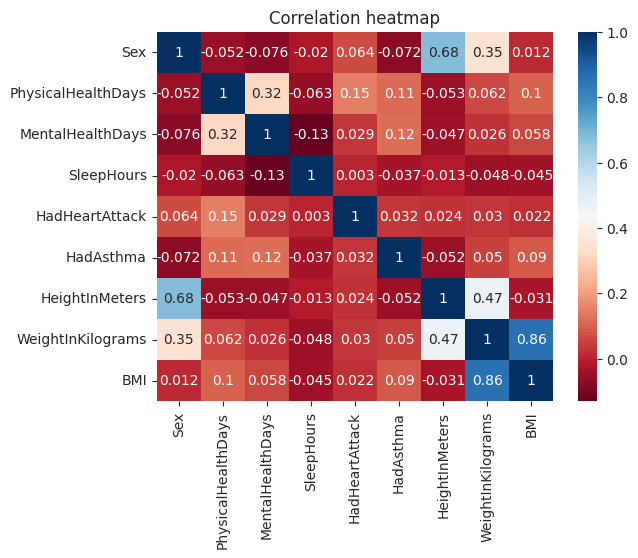

In [119]:
a = sns.heatmap(numCorr, cmap='RdBu', annot=True)
scatter_fig = a.get_figure()
plt.title('Correlation heatmap')
# use savefig function to save the plot and give
# a desired name to the plot.
scatter_fig.savefig('correlationHeat.png')


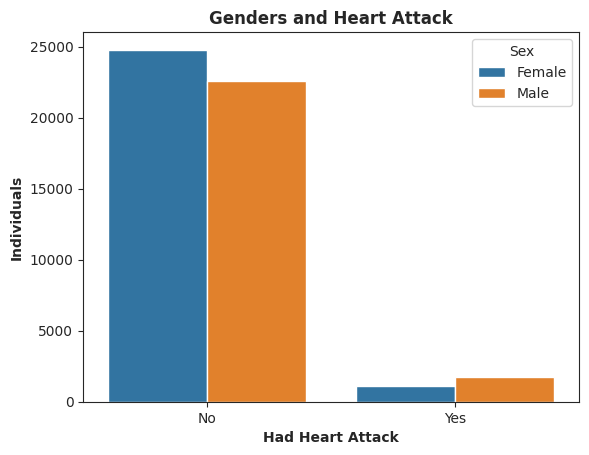

In [114]:
ax = sns.countplot(data = dfHeart, x = 'HadHeartAttack', hue = 'Sex')
customize_plot(ax,"Genders and Heart Attack","Had Heart Attack","Individuals", 12, 10)

scatter_fig = ax.get_figure()

# use savefig function to save the plot and give
# a desired name to the plot.
scatter_fig.savefig('genderHeartAttack.png')

<ipython-input-112-d6f85056a480>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


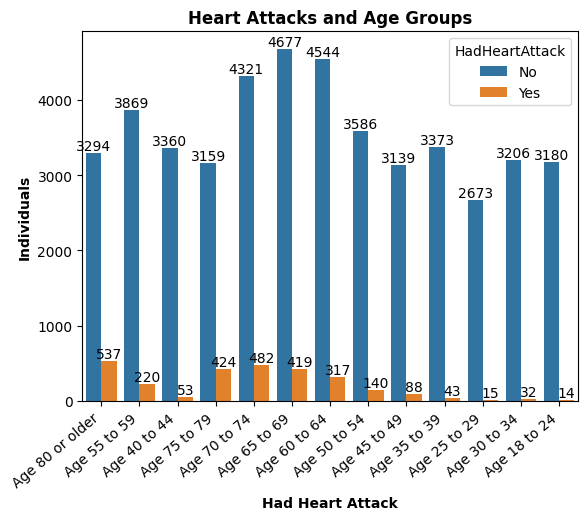

In [112]:
ax = sns.countplot(data = dfHeart, x = 'AgeCategory', hue = 'HadHeartAttack', )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
customize_plot(ax,"Heart Attacks and Age Groups","Had Heart Attack","Individuals",12,10)
for c in ax.containers:
    ax.bar_label(c)

scatter_fig = ax.get_figure()

# use savefig function to save the plot and give
# a desired name to the plot.
scatter_fig.savefig('countplotByAge.png')

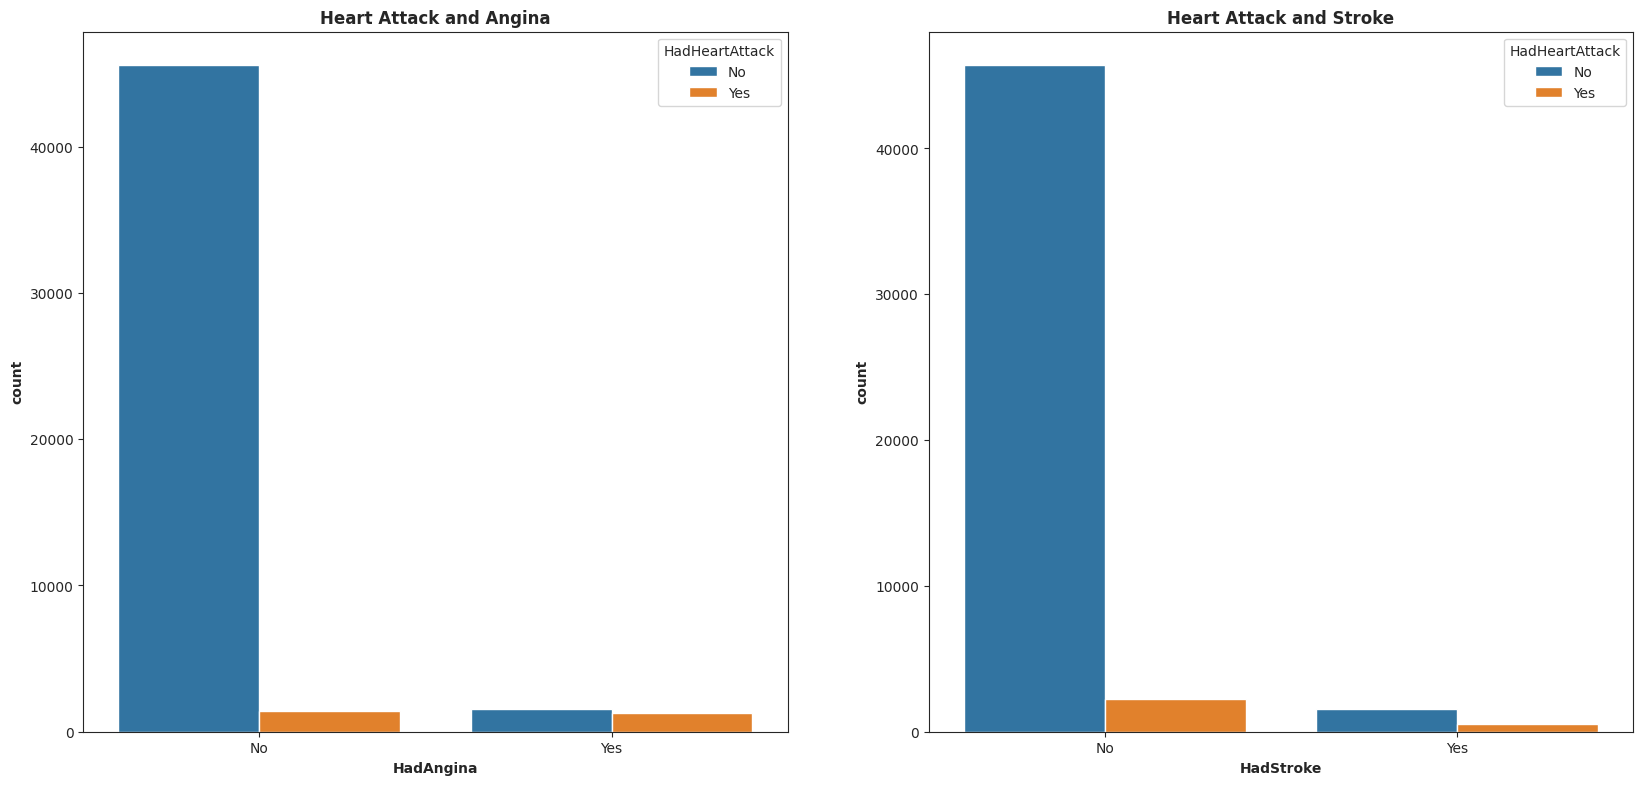

In [120]:
corr = dfHeart[[ 'HadHeartAttack', 'HadAngina', 'HadStroke']]
plt.figure(figsize=(20, 20))
sns.set_style('ticks')

for i,column in enumerate(corr.columns[1:],1):
    plt.subplot(2,2,i)


    ax = sns.countplot(data=corr, x=column, hue='HadHeartAttack')
    customize_plot(ax, 'Heart Attack and '+column[3:] , column, 'count', 12,10)

scatter_fig = ax.get_figure()

# use savefig function to save the plot and give
# a desired name to the plot.
scatter_fig.savefig('comparacionAnginaStroke.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')